# ***Importing Some Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

# ***Import Dataset***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Drive connected successfully!")

Mounted at /content/drive
Drive connected successfully!


# ***Create DataFrame***

In [ ]:
path = '/content/drive/MyDrive/world-happiness-report-2021.csv'
df = pd.read_csv(path)
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# ***Overview***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

# ***Cleaning***

In [ ]:
# Drop unnecessary columns
drop_cols = [
    'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
    'Ladder score in Dystopia', 'Explained by: Log GDP per capita',
    'Explained by: Social support', 'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices', 'Explained by: Generosity',
    'Explained by: Perceptions of corruption', 'Dystopia + residual'
]

df.drop(columns=drop_cols, inplace=True)

In [ ]:
df.rename(columns={
    "Country name": "Country",
    "Regional indicator": "Region",
    "Ladder score": "Happiness",
    "Logged GDP per capita": "GDP",
    "Healthy life expectancy": "Life_Expectancy",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Corruption"
}, inplace=True)

In [ ]:
df.head()

,Country,Region,Happiness,GDP,Social support,Life_Expectancy,Freedom,Generosity,Corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


## ***Check missing data***

In [ ]:
print("Missing Data")
df.isnull().sum()

Missing Data


,0
Country,0
Region,0
Happiness,0
GDP,0
Social support,0
Life_Expectancy,0
Freedom,0
Generosity,0
Corruption,0


**There is no Missing Data**

## ***Check duplictes***

In [ ]:
print("Drop Duplicated Data Done")
df = df.drop_duplicates()

Drop Duplicated Data


## ***Numerical Features***

In [ ]:
df.describe()

,Happiness,GDP,Social support,Life_Expectancy,Freedom,Generosity,Corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


**It seems to not having alot outliers (min not too far from max) but alittle skewed (mean close to median)**

**For more ensurance using visualization(histogram, boxplot):**

## **Histogram**

In [ ]:
numerical_columns = ["Happiness", "GDP", "Social support", "Life_Expectancy", "Freedom", "Generosity", "Corruption"]

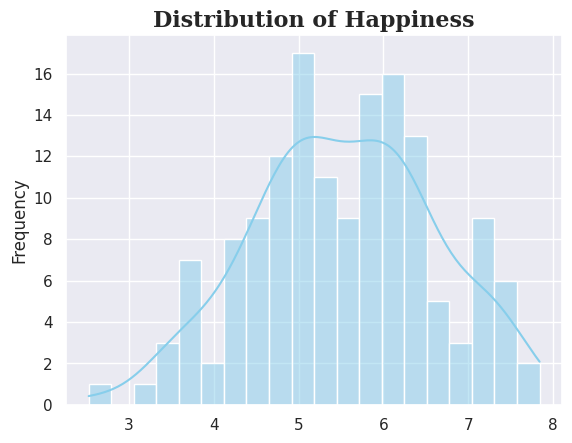

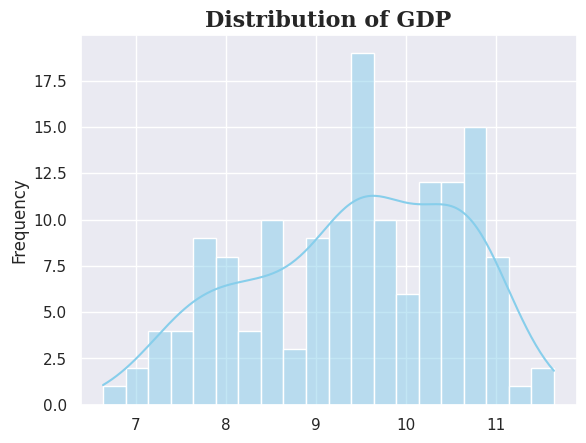

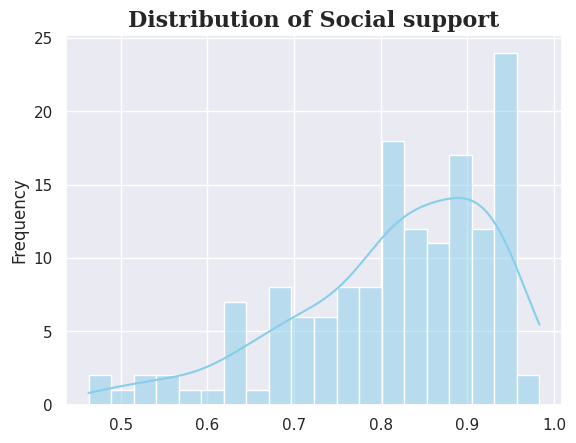

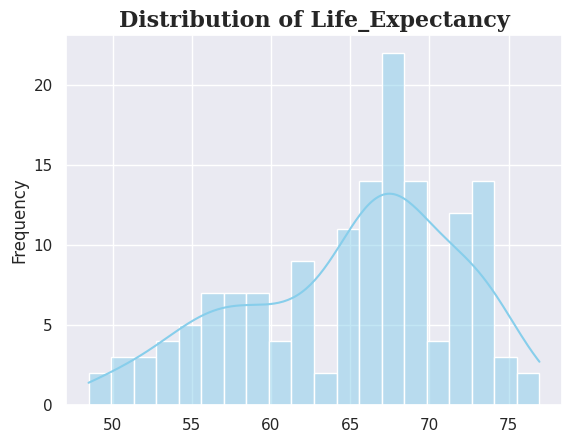

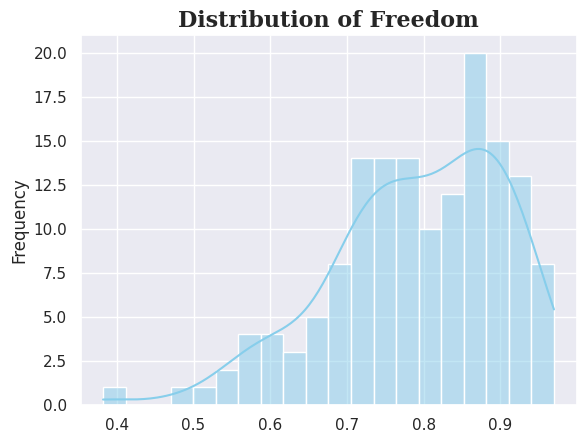

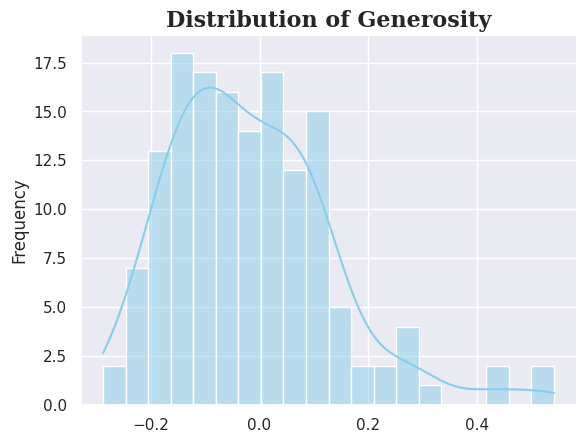

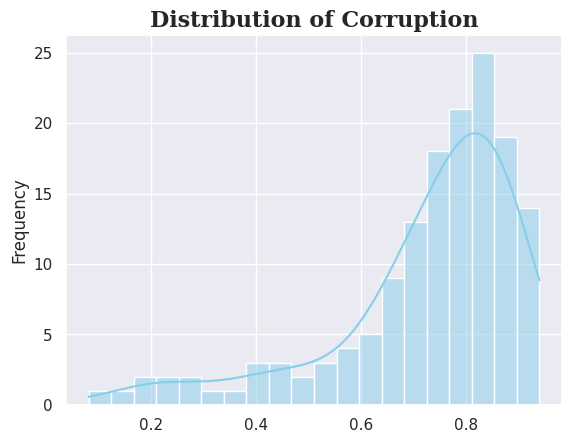

In [ ]:
for col in numerical_columns:
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col}', fontdict={'fontsize': 16, 'fontweight': 'bold', 'family': 'serif'})
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

It seems to be skewed in:

• `Social support` (negative skewed)

• `Freedom` (negative skewed)

• `Generosity` (positive skewed)

• `Corruption` (negative skewed)

## **Boxplot**

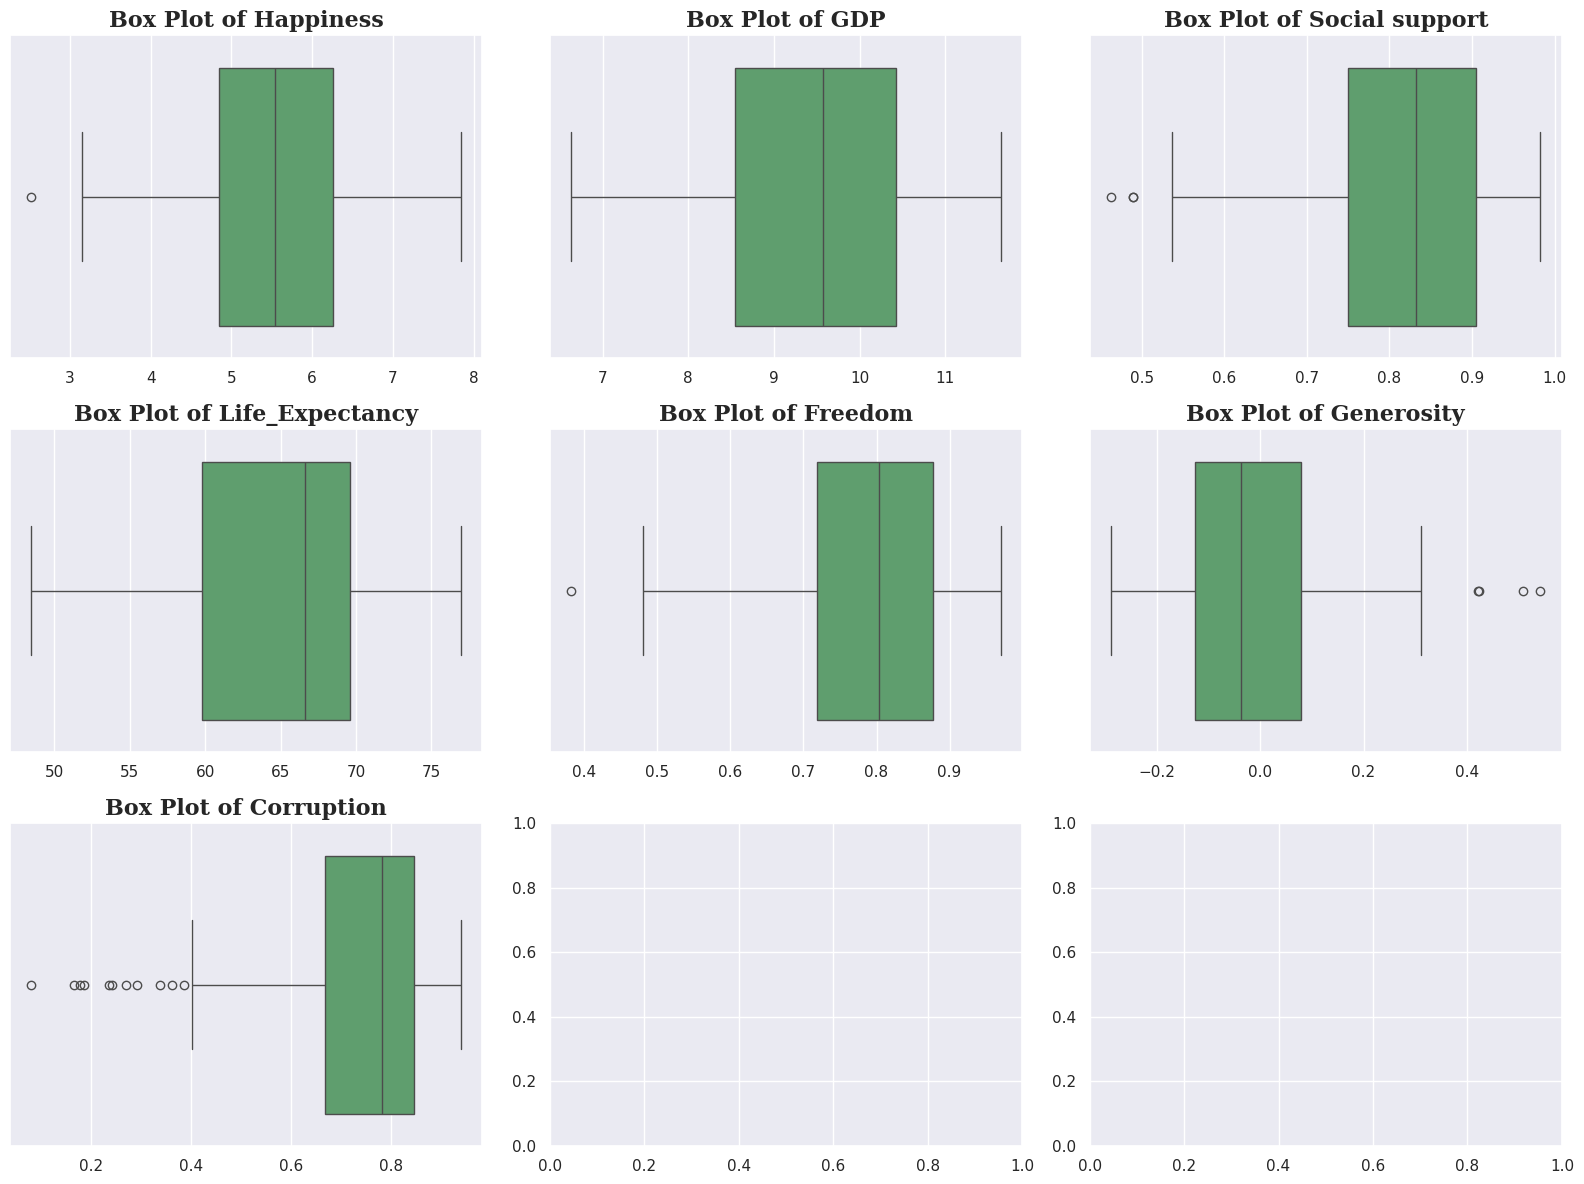

In [ ]:
num_cols = len(numerical_columns)
cols = 3
rows = math.ceil(num_cols / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], color = 'g', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontdict={'fontsize': 16, 'fontweight': 'bold', 'family': 'serif'})
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


# Adjust spacing between subplots
plt.tight_layout()

It seems to existing outliers in `Social supprt`, `corruption`, `Generosity`

In [ ]:
# Remove outliers (using IQR method for Happiness Score)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

outlier_cols = ['Happiness','Social support', 'Corruption', 'Generosity']
for col in outlier_cols:
    df = remove_outliers(df, col)

print("Outliers Removed", df.shape)

Outliers Removed (121, 9)


# ***Object columns***

In [ ]:
obj_columns = ["Country", "Region"]

In [ ]:
for col in obj_columns:
  print(f"***{col}***")
  print(df[col].describe())
  print("*"*50)

***Country***
count         149
unique        149
top       Finland
freq            1
Name: Country, dtype: object
**************************************************
***Region***
count                    149
unique                    10
top       Sub-Saharan Africa
freq                      36
Name: Region, dtype: object
**************************************************


there are many unique countries, I will choose `Region` for plotting

In [ ]:
num_unique_regions = df["Region"].value_counts()
num_unique_regions

,count
Region,
Sub-Saharan Africa,36
Western Europe,21
Latin America and Caribbean,20
Central and Eastern Europe,17
Middle East and North Africa,17
Commonwealth of Independent States,12
Southeast Asia,9
South Asia,7
East Asia,6


/tmp/ipython-input-2124221541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Region', palette='Pastel2')


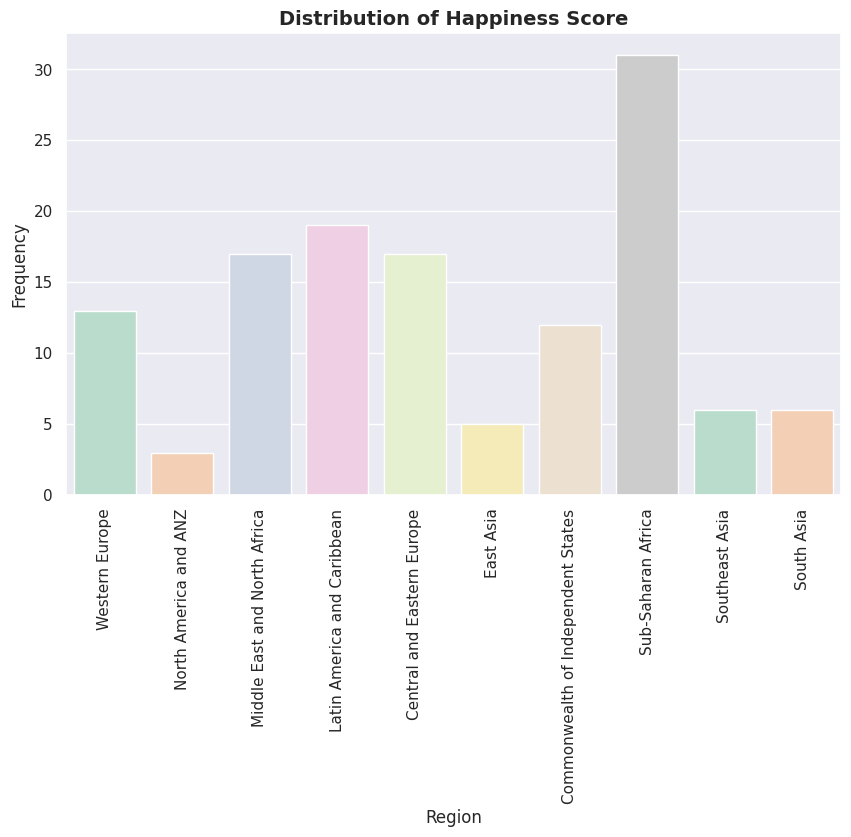

In [ ]:
# Plot the frequency count of Region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', palette='Pastel2')
plt.title("Distribution of Happiness Score", fontsize=14, weight="bold")
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.show()

In [ ]:
pivot_region = df.pivot_table(values="Happiness", index="Region", aggfunc="mean").sort_values(by="Happiness", ascending=False)
print(pivot_region)


                                    Happiness
Region                                       
North America and ANZ                6.951000
Western Europe                       6.406500
Latin America and Caribbean          6.028737
Central and Eastern Europe           5.972000
East Asia                            5.877000
Commonwealth of Independent States   5.425400
Southeast Asia                       5.420000
Middle East and North Africa         5.219765
South Asia                           4.761667
Sub-Saharan Africa                   4.545645


# ***Relations between two features:***

Each feature with target(Happiness):
See correlation using heatmap:

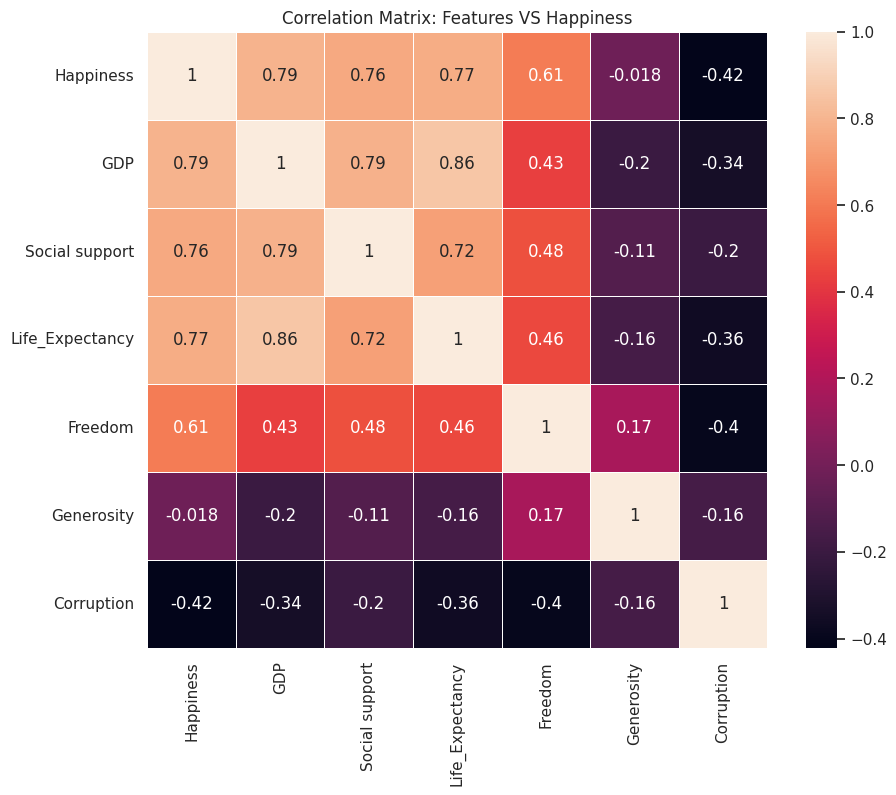

In [ ]:
#matrix = df.corr(numerical_columns)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5);
plt.title("Correlation Matrix: Features VS Happiness")
plt.show()

In [ ]:
df.corr(numeric_only=True)['Happiness']

,Happiness
Happiness,1.000000
GDP,0.789760
Social support,0.756888
Life_Expectancy,0.768099
Freedom,0.607753
Generosity,-0.017799
Corruption,-0.421140



With `Happiness`:

• Strong positive correlation with `GDP`, `Social support`, `Life_Expectancy`, `Freedom`(less)


• Weak correlation with `Generosity` and `Corruption`

GDP, Social Support, and Life Expectancy show the strongest positive correlation with Happiness.
Freedom is moderately positively correlated.
Generosity and Corruption perception have weak or inconsistent correlations, indicating cultural/perceptual influence.
Some scatter plots (e.g., Happiness vs GDP) suggest near-linear patterns; others (e.g., Generosity) are more diffuse.
🔍 Key Takeaway:
Economic and social factors (GDP, support, health) are most strongly linked to happiness, while ethical/cultural factors (generosity, corruption) are less consistent predictors.

<Axes: xlabel='GDP', ylabel='Happiness'>

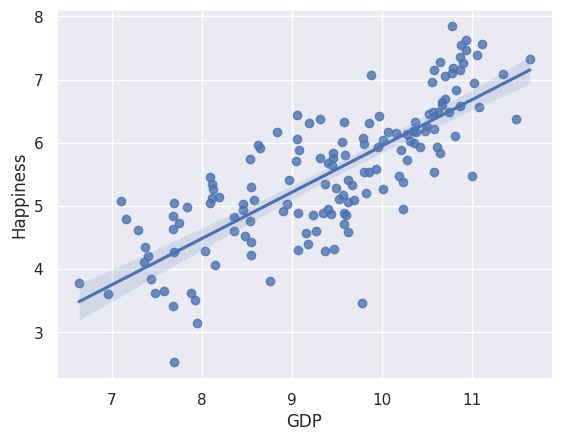

In [ ]:
sns.regplot(x='GDP', y='Happiness', data= df)

<Axes: xlabel='GDP', ylabel='Generosity'>

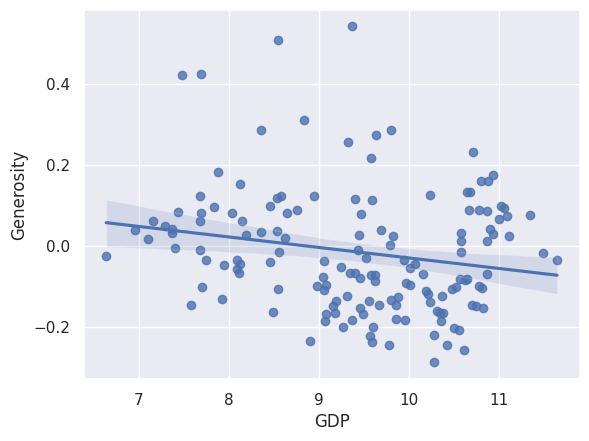

In [ ]:
sns.regplot(x='GDP', y='Generosity', data= df)

Data spreads and not making linear plot

#***Happiness with `country`, `Region` features***

## ***Average Happiness Score by Region***

/tmp/ipython-input-1149994563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= pivot_region['Happiness'], y = pivot_region.index, palette="Pastel1");


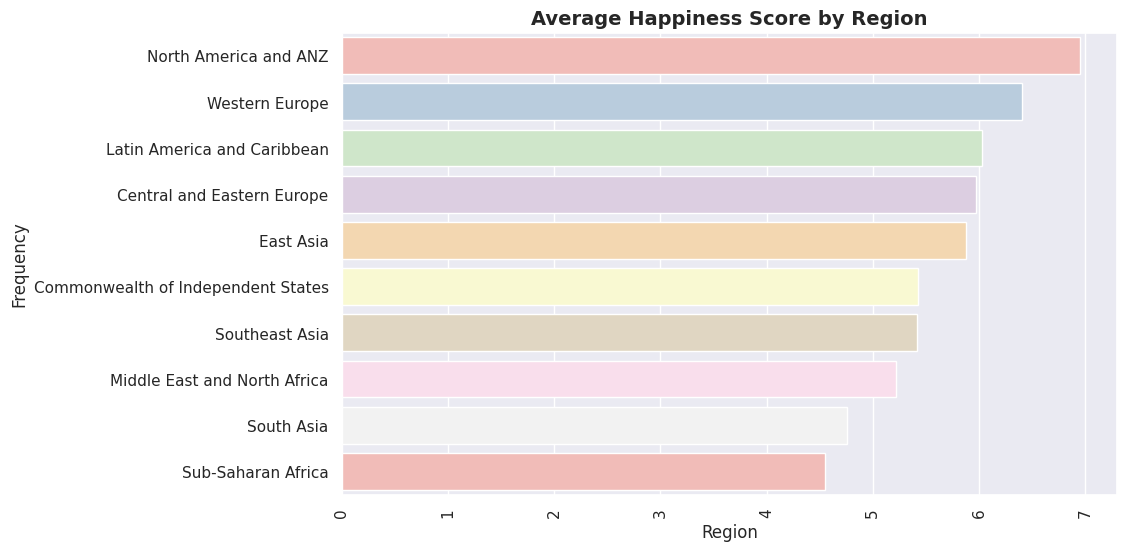

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot( x= pivot_region['Happiness'], y = pivot_region.index, palette="Pastel1");
plt.xticks(rotation=90)
plt.title("Average Happiness Score by Region", fontsize=14, weight="bold")
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
numerical_columns = ["Happiness", "GDP", "Social support", "Life_Expectancy", "Freedom", "Generosity", "Corruption"]

/tmp/ipython-input-3707761040.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='Paired');
/tmp/ipython-input-3707761040.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='Paired');
/tmp/ipython-input-3707761040.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='Paired');
/tmp/ipython-input-3707761040.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is d

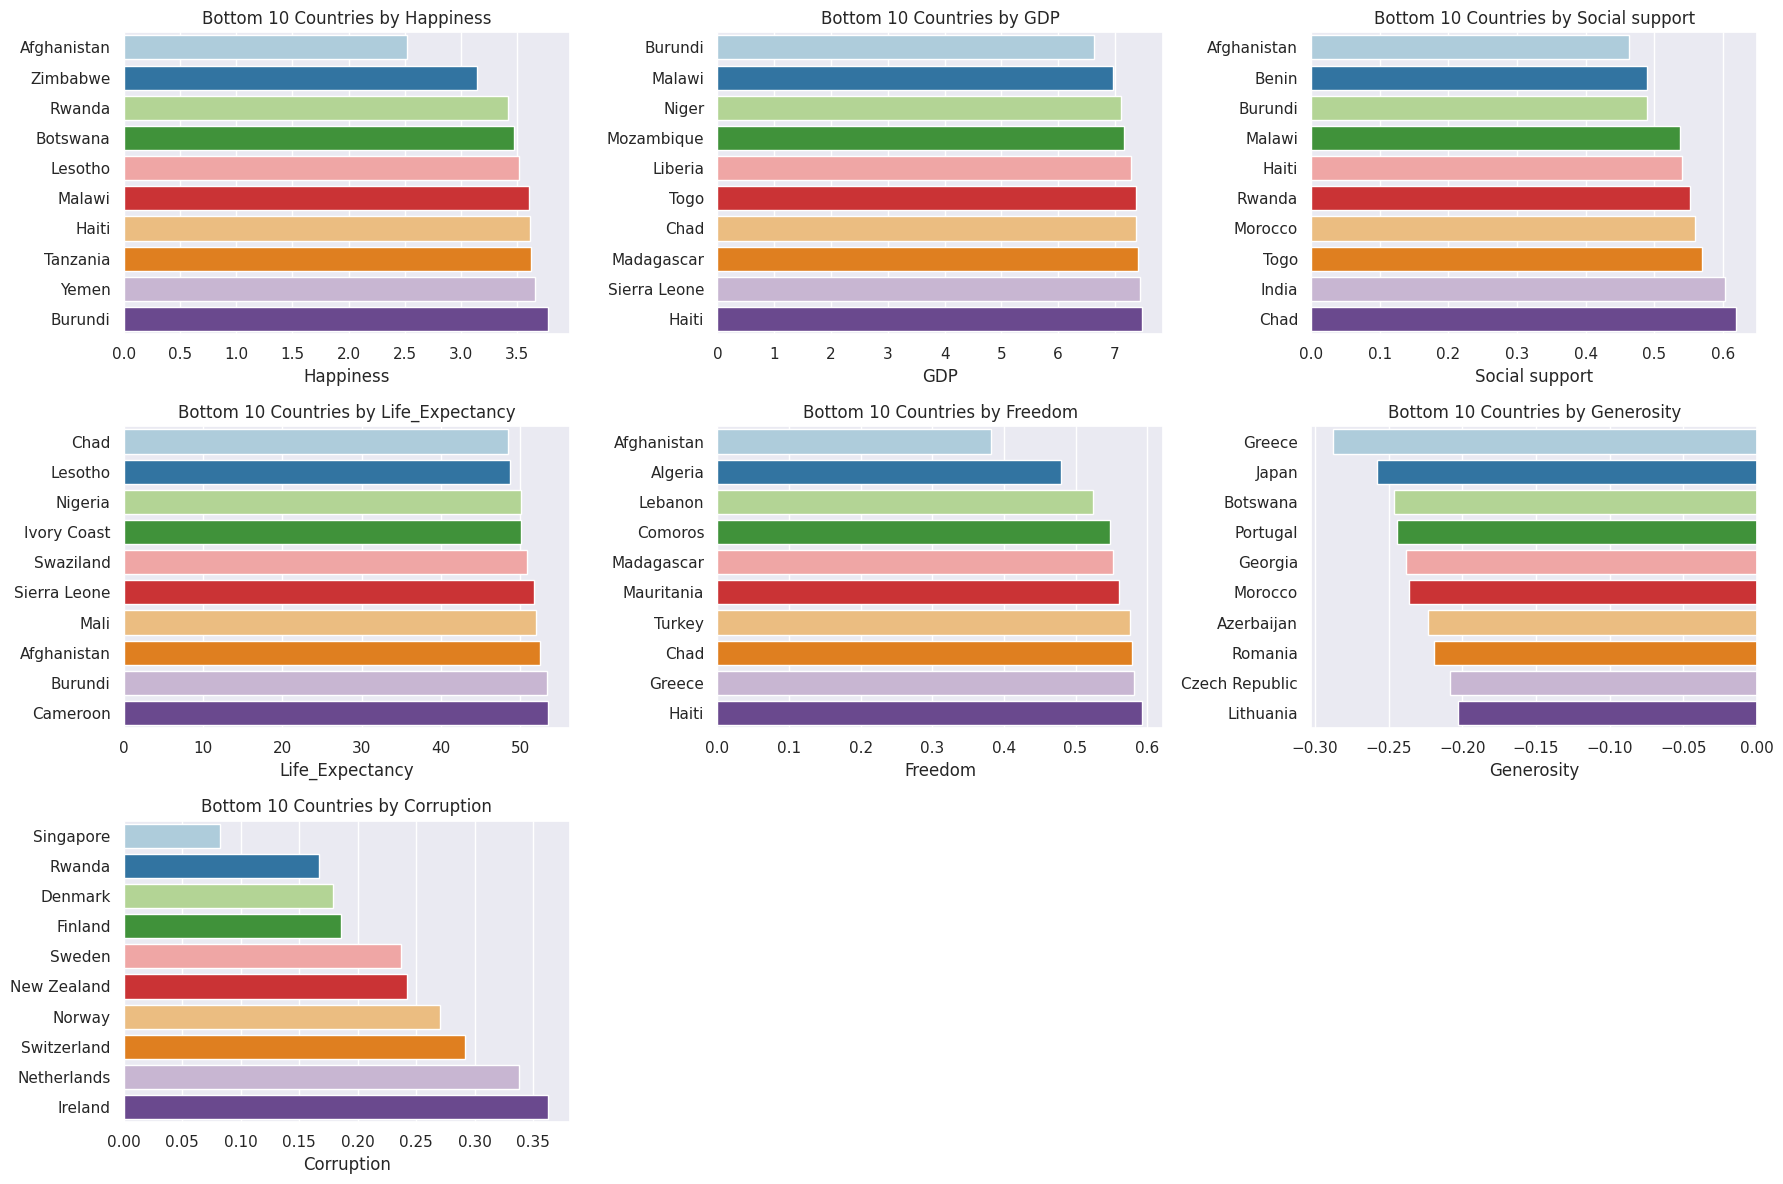

In [ ]:
num_cols = len(numerical_columns)
cols = 3
rows = math.ceil(num_cols / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

# Plot bottom 10 bar charts
for i, col in enumerate(numerical_columns):
    bottom10 = df[['Country', col]].sort_values(by=col, ascending=True).head(10)
    sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='Paired');
    axes[i].set_title(f"Bottom 10 Countries by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

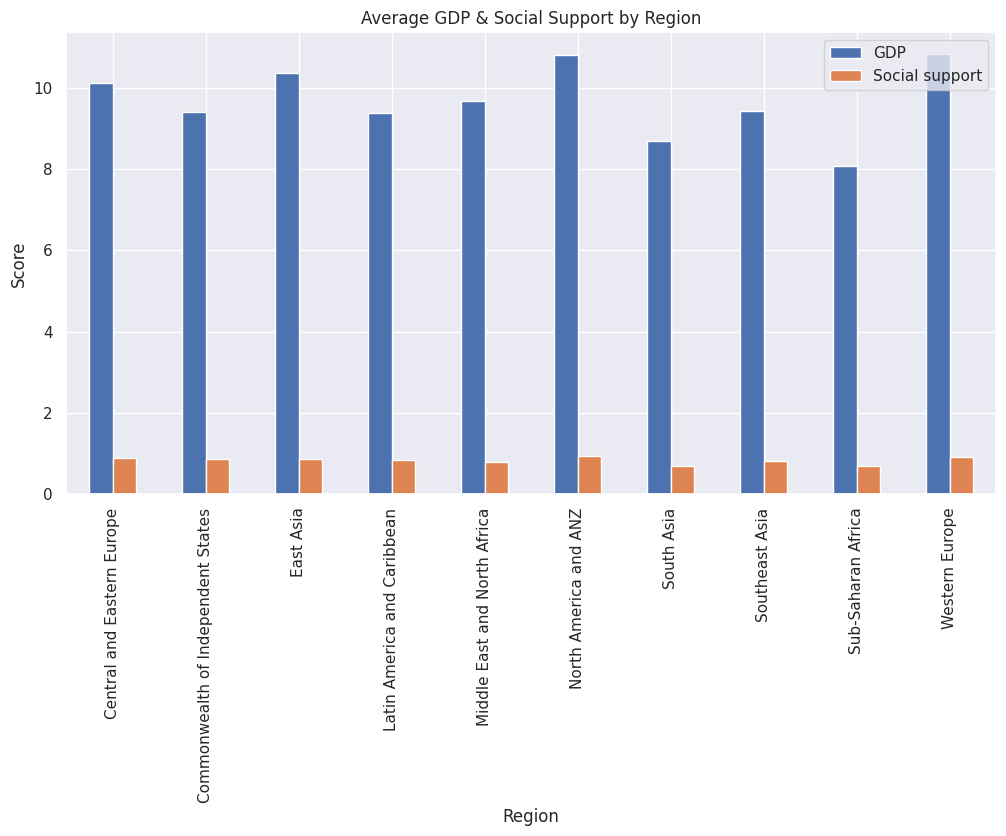

In [ ]:
pivot_gdp_social = df.pivot_table(index="Region", values=["GDP","Social support"], aggfunc="mean")

pivot_gdp_social.plot(kind="bar", figsize=(12,6))
plt.title("Average GDP & Social Support by Region")
plt.ylabel("Score")
plt.xlabel("Region")
plt.show()

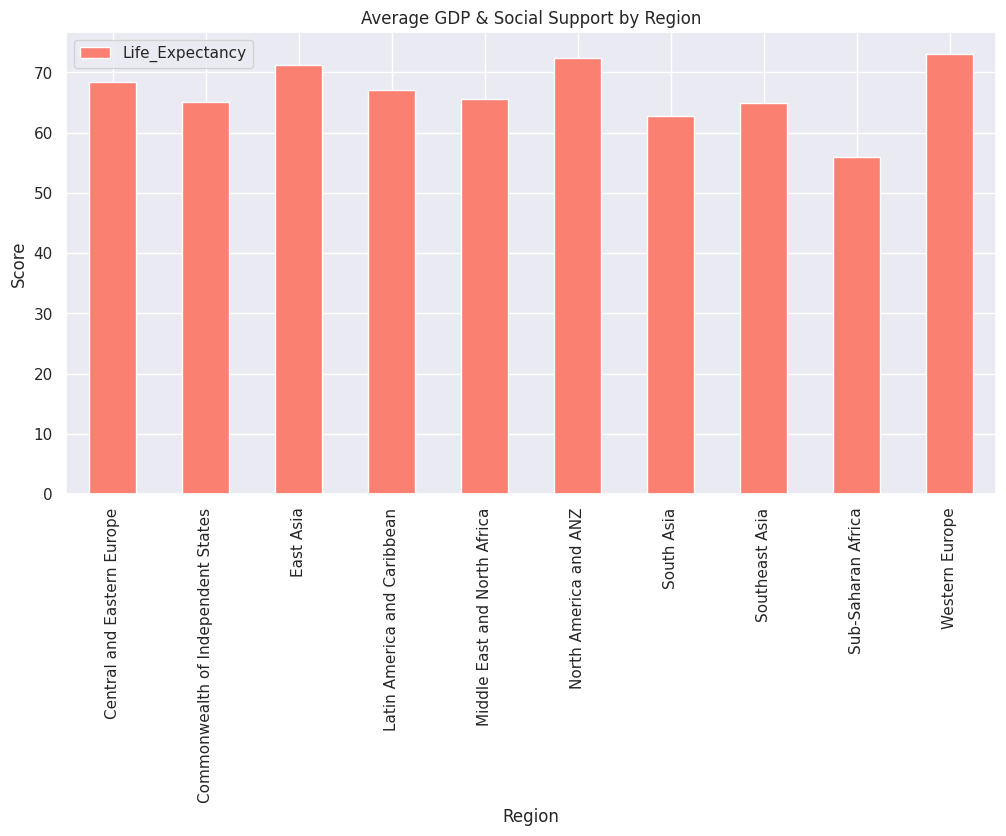

In [ ]:
pivot_gdp_social = df.pivot_table(index="Region", values="Life_Expectancy", aggfunc="mean")

pivot_gdp_social.plot(kind="bar", figsize=(12,6), color= 'salmon')
plt.title("Average GDP & Social Support by Region")
plt.ylabel("Score")
plt.xlabel("Region")
plt.show()

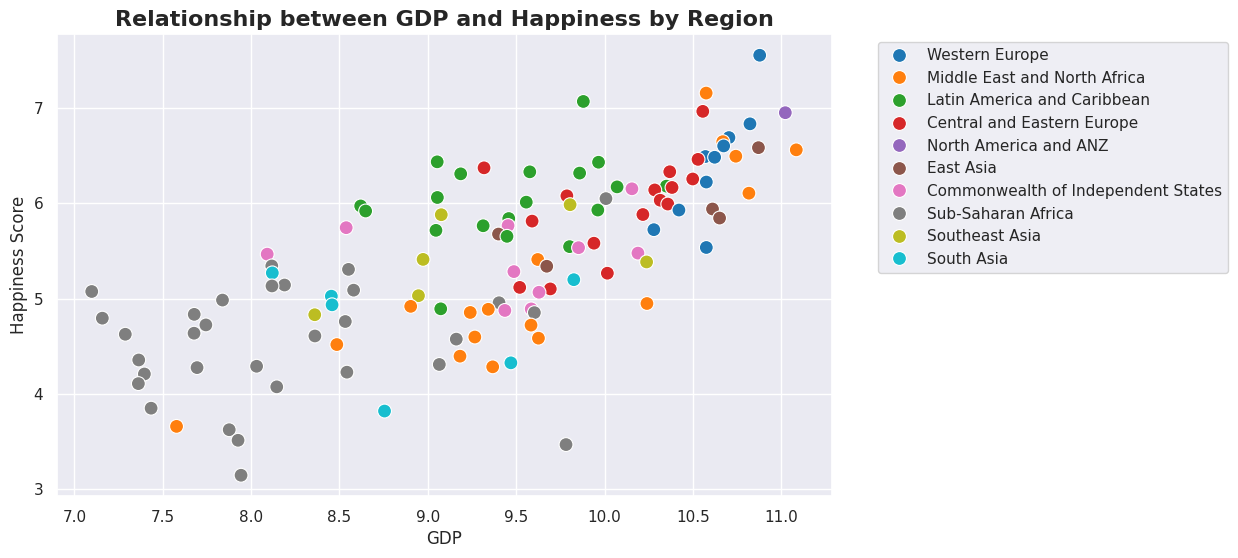

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="GDP", y="Happiness", hue="Region", palette="tab10", s=100)
plt.title("Relationship between GDP and Happiness by Region", fontsize=16, fontweight="bold")
plt.xlabel("GDP")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

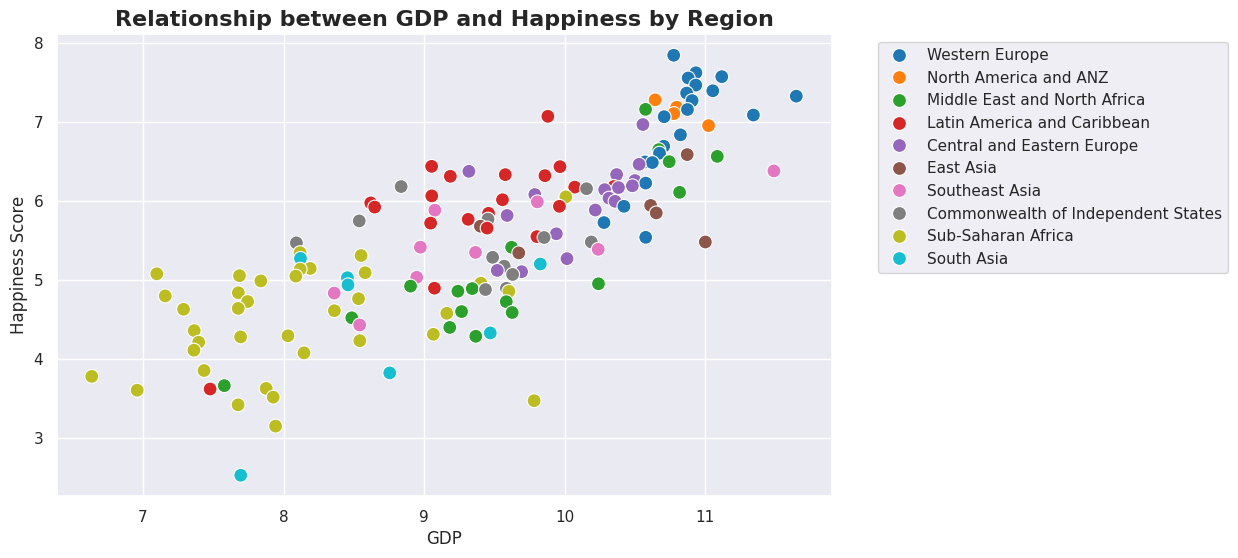

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="GDP", y="Happiness", hue="Region", palette="tab10", s=100)
plt.title("Relationship between GDP and Happiness by Region", fontsize=16, fontweight="bold")
plt.xlabel("GDP")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

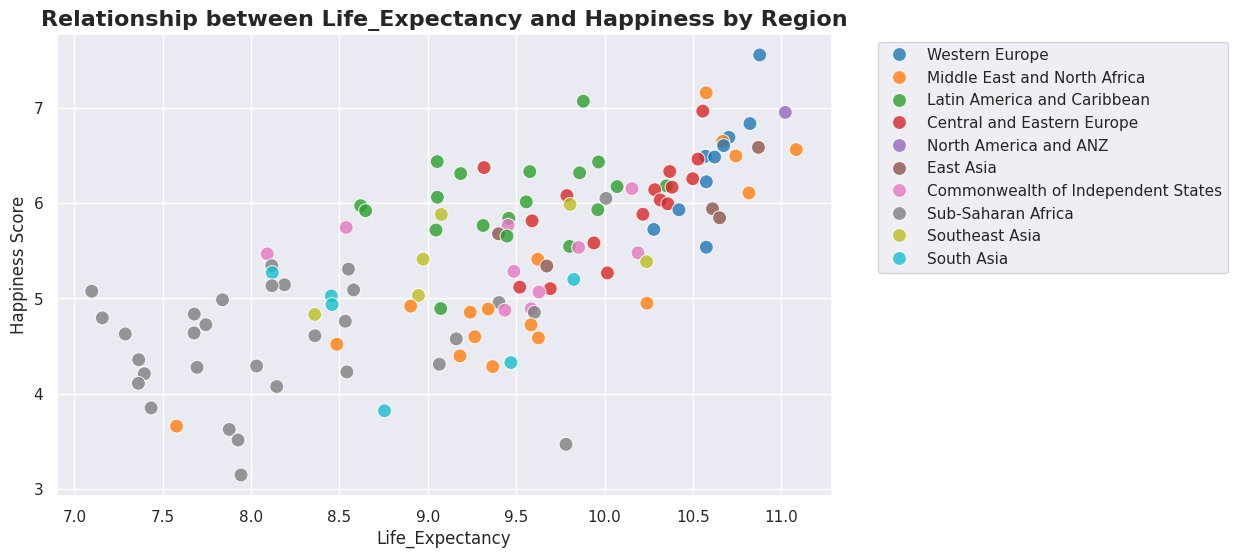

In [ ]:
# Scatterplot Happiness vs Health
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="GDP", y="Happiness", hue="Region", palette="tab10", s=100, alpha=0.8)
plt.title("Relationship between Life_Expectancy and Happiness by Region", fontsize=16, weight="bold")
plt.xlabel("Life_Expectancy")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


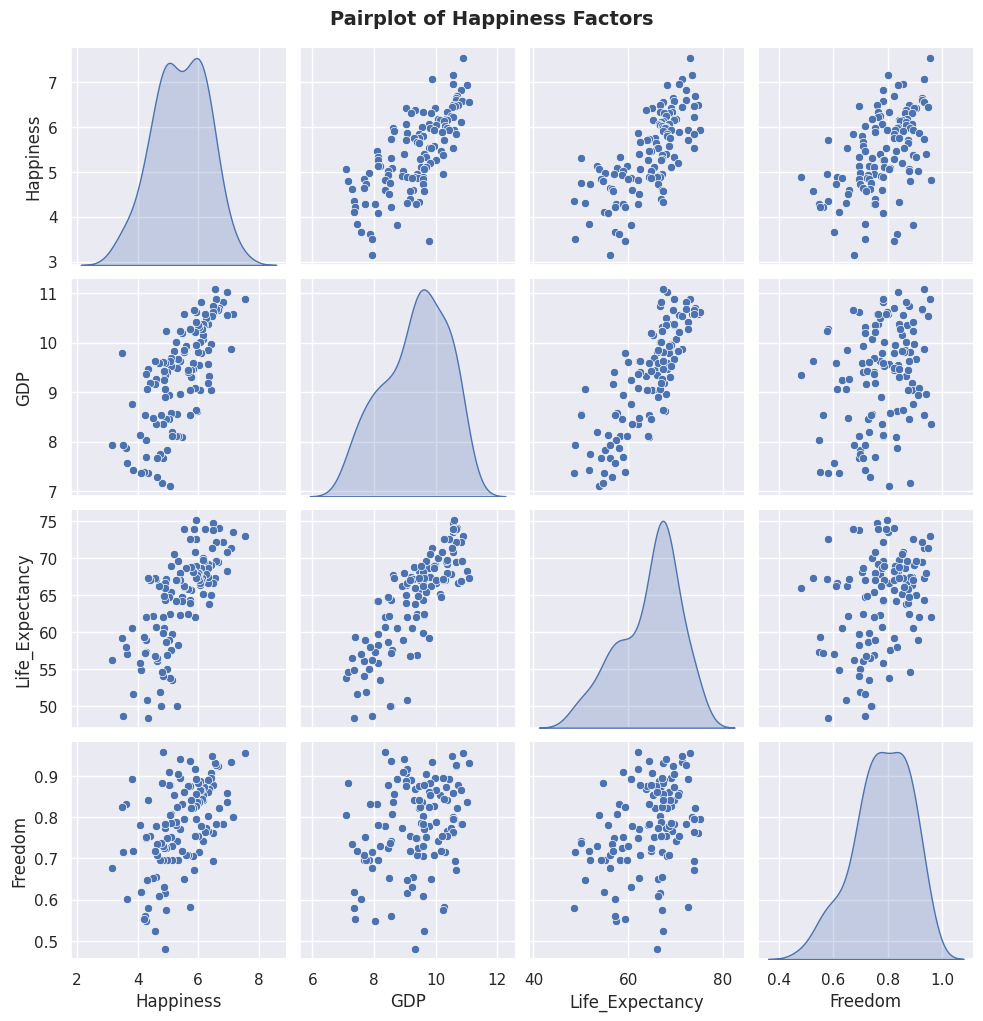

In [ ]:
# Pairplot for selected features
sns.pairplot(df[["Happiness", "GDP", "Life_Expectancy", "Freedom"]], diag_kind="kde")
plt.suptitle("Pairplot of Happiness Factors", y=1.02, fontsize=14, weight="bold")
plt.show()

##***Regional Distributions Summary***


• North America, Western Europe and ANZ show higher mean for GDP, Life Expectancy, and Happiness.

•
Sub-Saharan Africa and parts of South Asia score lowest in both Happiness and Life Expectancy.

• Social support is more evenly distributedthan most features.

• These visuals highlight how economic and social factors differ not only between countries but between entire region

#***Key Findings:***

● Top Influencers of Happiness:

GDP, Social support, and Life_Expectancy show the strongest positive correlations with Happiness.

Freedom also contributes positively but with slightly less impact.

Generosity and Corruption show weaker and more variable relationships — possibly due to cultural or perceptual differences.

● Regional Trends:

Western Europe and North America & ANZ consistently rank highest in most features, especially Happiness, GDP, and Freedom.
Sub-Saharan Africa and parts of South Asia score lowest in both Happiness and Life Expectancy.

● Top & Bottom Countries:

Countries like Finland, Denmark, Switzerland appear frequently in the top 10 across many features.

***The World Happiness Report data clearly shows that economic prosperity, strong social networks, and health are key contributors to happiness worldwide.
While ethical factors like generosity and perceived corruption matter, their impact appears less direct and more culturally nuanced.***